Bagging:
Bootstrap Aggregation (bagging) is a ensembling method that attempts to resolve overfitting for classification or regression problems. Bagging aims to improve the accuracy and performance of machine learning algorithms. It does this by taking random subsets of an original dataset, with replacement, and fits either a classifier (for classification) or regressor (for regression) to each subset. The predictions for each subset are then aggregated through majority vote for classification or averaging for regression, increasing prediction accuracy.

In [3]:
# Import the necessary data and evaluate base classifier performance.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=22)

dtree = DecisionTreeClassifier(random_state=22)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy",accuracy_score(y_true=y_train, y_pred=dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy 1.0
Test data accuracy: 0.8222222222222222


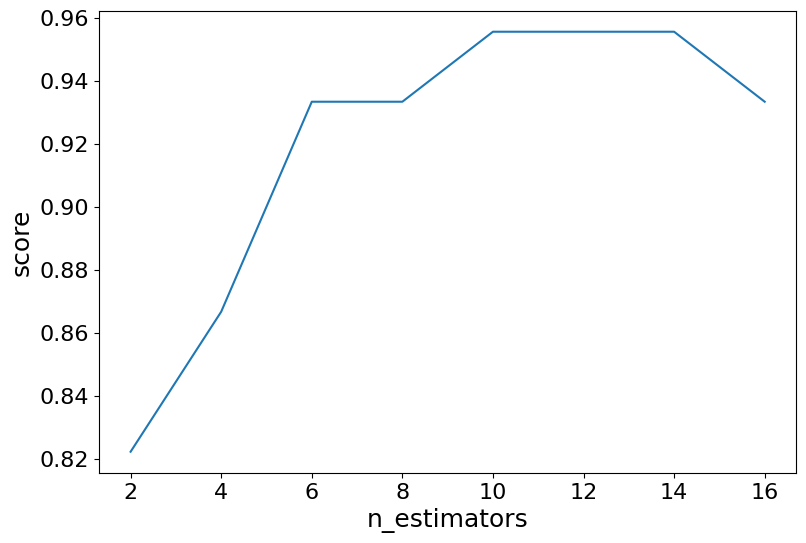

In [5]:
# Import the necessary data and evaluate the BaggingClassifier performance.

# For bagging we need to set the parameter n_estimators, this is the number of base classifiers that our model is going to aggregate together.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame=True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range =  [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:
    
    # create bagging classifier
    clf = BaggingClassifier(n_estimators=n_estimators, random_state=22)
    
    # fit the model
    clf.fit(X_train, y_train)
    
    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))
    
    
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [7]:
# Create a model with out of bag metric.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=22)

oob_model = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesi

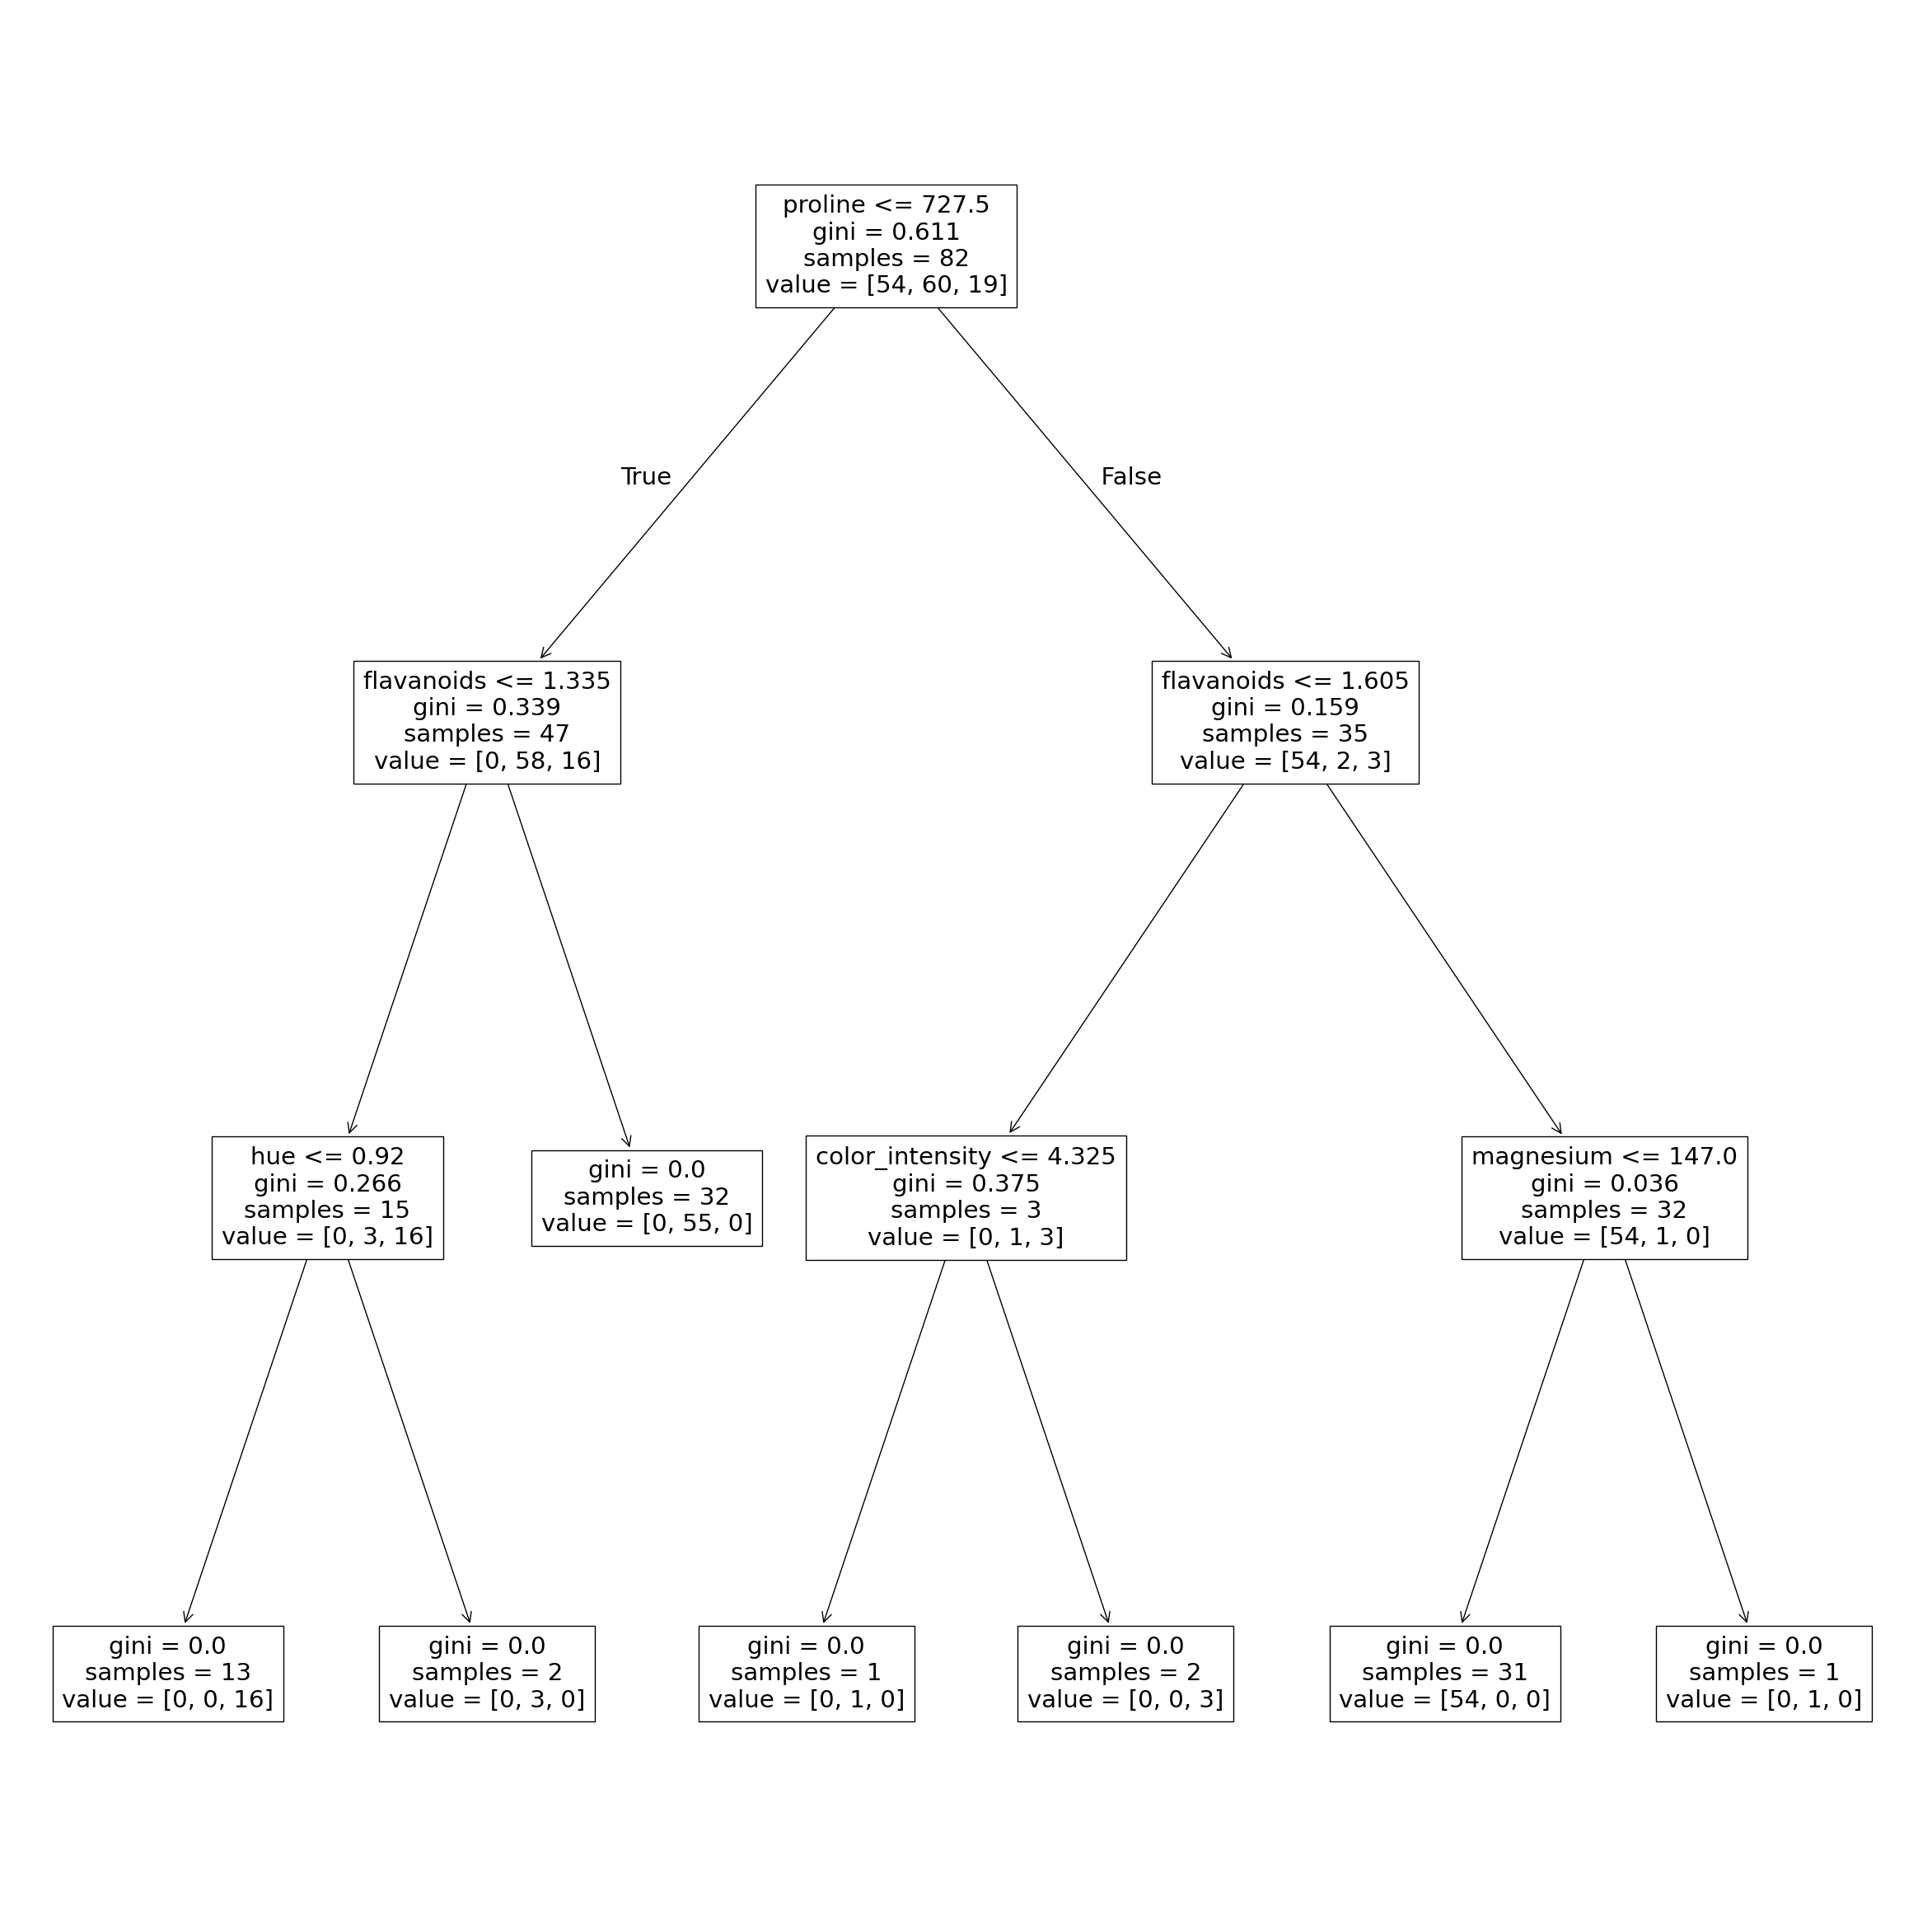

In [9]:
# Generate Decision Tree from Bagging classifier

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=22)

clf = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30,30))

plot_tree(clf.estimators_[0],feature_names=
          X.columns)